In [20]:
from models.utils import check_anndata

import pandas as pd

# reading deconv results
save_path = 'seqFISH3000'
st_target_path = f"../datasets/seqFISH//spatial/seqFISH_st3000.h5ad"
st_rna_adata = check_anndata(
        st_target_path, True)
# read st adata for visualization
cell_type_proportion_matrix = pd.read_csv(f"{save_path}/cell_type_results.csv", index_col=0)
mapping_matrix = pd.read_csv(f"{save_path}/map_results.csv", index_col=0)
print(cell_type_proportion_matrix)

Data matrix:
(71, 3000)
[[0 0 0 ... 0 0 0]
 [0 2 2 ... 2 0 2]
 [0 0 0 ... 0 0 1]
 ...
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
Data obs:
    cell_id  astrocytes      Olig  endo.mural   iNeuron   eNeuron  microglia  \
0         0    0.000000  0.000000    1.000000  0.000000  0.000000   0.000000   
1         1    0.333333  0.000000    0.333333  0.333333  0.000000   0.000000   
2         2    0.250000  0.250000    0.250000  0.000000  0.000000   0.250000   
3         3    0.333333  0.000000    0.000000  0.333333  0.000000   0.333333   
4         7    0.000000  0.000000    0.000000  0.000000  1.000000   0.000000   
..      ...         ...       ...         ...       ...       ...        ...   
66      102    0.083333  0.333333    0.083333  0.000000  0.500000   0.000000   
67      103    0.083333  0.416667    0.083333  0.000000  0.416667   0.000000   
68      104    1.000000  0.000000    0.000000  0.000000  0.000000   0.000000   
69      109    0.500000  0.500000    0.000000 

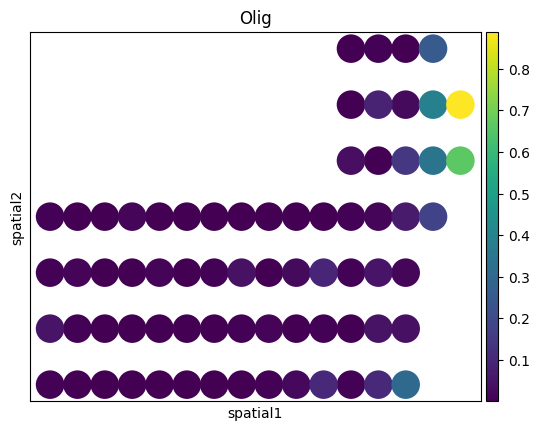

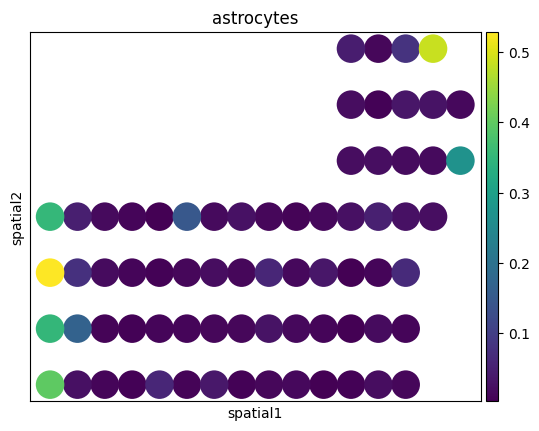

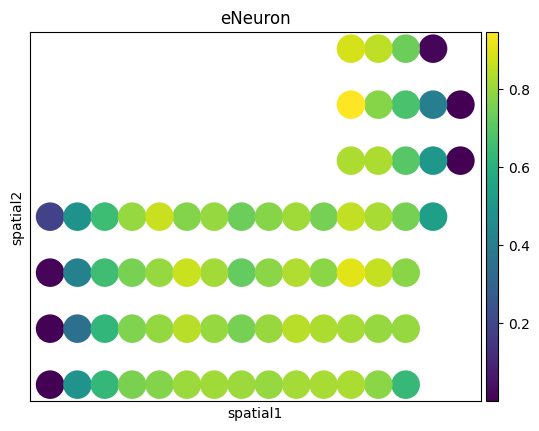

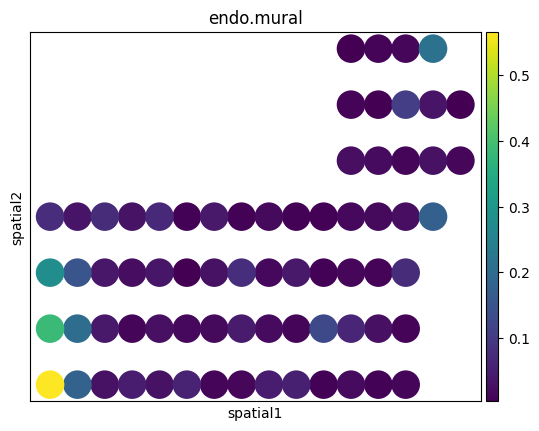

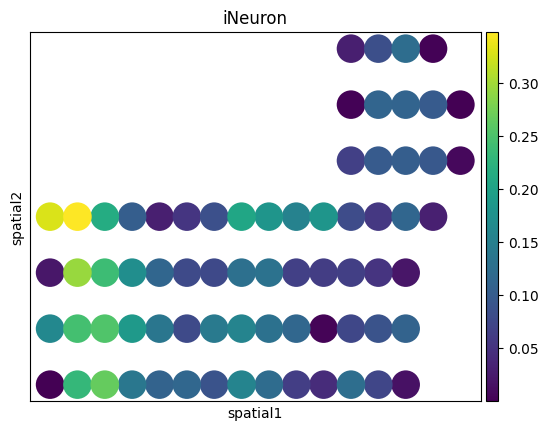

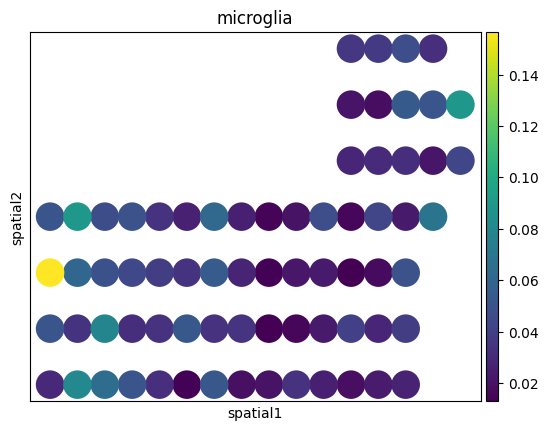

In [21]:
import scanpy as sc
# visualizing draw heatmaps

cell_type_set_list = cell_type_proportion_matrix.columns.tolist()
cell_type_propotion_values_matrix = cell_type_proportion_matrix.values
cell_type_number = len(cell_type_set_list)
for i in range(cell_type_number):
    ct = cell_type_set_list[i]
    st_rna_adata.obs[ct] = cell_type_propotion_values_matrix[:, i]
    new_ct = ct.replace('/', '-')
    sc.pl.embedding(st_rna_adata, basis='spatial', color=[ct], title=f'{ct}', show=True,
                    save=f'st_spatial_{new_ct}.png')

6
Drawing pie 0/71


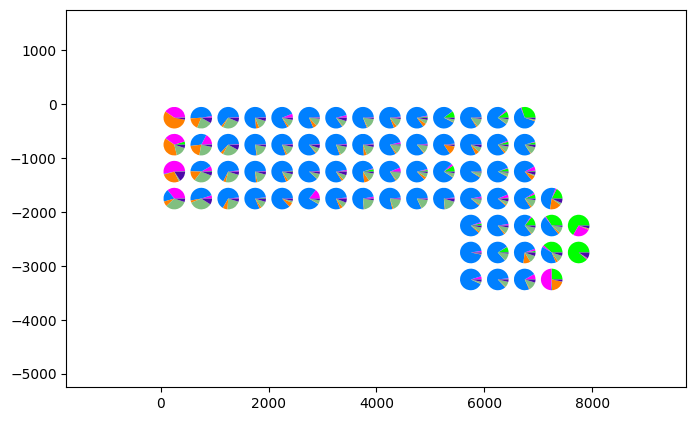

In [22]:
from models.utils import generate_distinct_colors, drawPieMarker

# visualizing scatter pie

# generating colors for scatter pie
colors = generate_distinct_colors(len(cell_type_set_list))
radios = cell_type_proportion_matrix.values
y = (-st_rna_adata.obsm['spatial'][:,1]).tolist()
x = st_rna_adata.obsm['spatial'][:,0].tolist()
print(len(colors))
radios = radios.tolist()
ct_dic = {}
for i in range(len(cell_type_set_list)):
    new_total_cell_type = cell_type_set_list[i].replace('/', '-')
    ct_dic[new_total_cell_type] = i
    ct_dic[cell_type_set_list[i]] = i
target_colors = []
for ct in cell_type_set_list:
    target_colors.append(colors[ct_dic[ct]])
# size need manual resized in different datasets
drawPieMarker(xs=x, ys=y, ratios=radios, sizes=200, colors=target_colors, save_path=f"{save_path}/scatter_pie.png",
              rasterize=True, show=True)